In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd

In [22]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [12]:
X_train = train_df.drop('label', axis=1)  # 60,000 × 784
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)    # 10,000 × 784
y_test = test_df['label']

In [13]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP (Neural Network)': MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train model

    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    print(f'\n{name} Accuracy: {accuracy:.3f}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [  

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
results = {
    'Logistic Regression': 0.92,  # Example accuracy
    'KNN': 0.96,
    'MLP (Neural Network)': 0.95
}




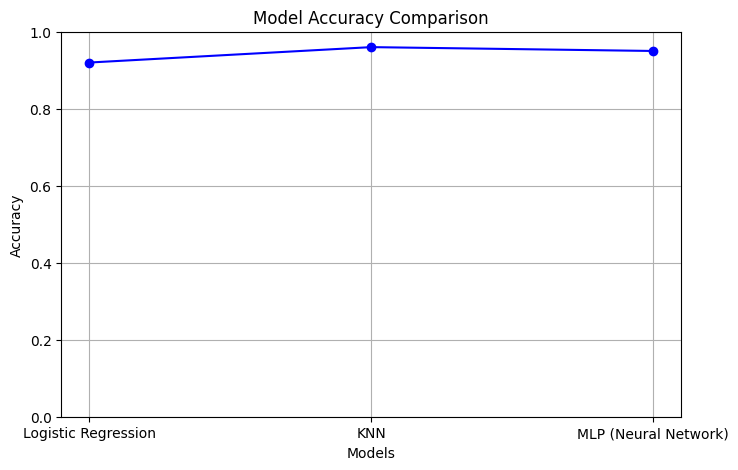

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='b')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [24]:
#random_search = RandomizedSearchCV(
 #   LogisticRegression(max_iter=200),
  #  param_dist,
   # cv=5,
    #n_iter=5,  # Reduce trials
    #scoring='accuracy',
    #random_state=42
#)
#random_search.fit(X_train, y_train)

KeyboardInterrupt: 